In [4]:
%reset -f

import ROOT, numpy

ROOT.gStyle.SetAxisColor(16,"xy")

grs={}
for Q2,xb in [(1.38,0.169), (2.24,0.332)]:
    grt,grlt,grtt = [ROOT.TGraph(), ROOT.TGraph(), ROOT.TGraph()]
    grs[(Q2,xb)] = (grt,grlt,grtt)
    for mt in numpy.arange(-2,0,0.01):
        aa = !./vpk_dvmpx $mt $xb $Q2 0
        if aa:
            eps,st,sl,stt,slt = [float(vv) for vv in aa[0].split()]
            grt.SetPoint(grt.GetN(), -mt, st)
            grlt.SetPoint(grlt.GetN(), -mt, slt)
            grtt.SetPoint(grtt.GetN(), -mt, stt)


mgrs = []
for tpl in grs:
    grt,grlt,grtt = grs[tpl]
    grlt.SetLineColor(2)
    grtt.SetLineColor(4)
    
    mgr = ROOT.TMultiGraph()
    mgr.Add(grt)
    mgr.Add(grlt)
    mgr.Add(grtt)
    mgr.SetTitle("Q2,xB="+str(tpl)+";-t")
    leg = ROOT.TLegend(0.8,0.7,0.9,0.9)
    leg.AddEntry(grt,"#sigma_{T}","L")
    leg.AddEntry(grlt,"#sigma_{LT}","L")
    leg.AddEntry(grtt,"#sigma_{TT}","L")
    mgr.GetListOfFunctions().Add(leg)

    mgrs.append(mgr)

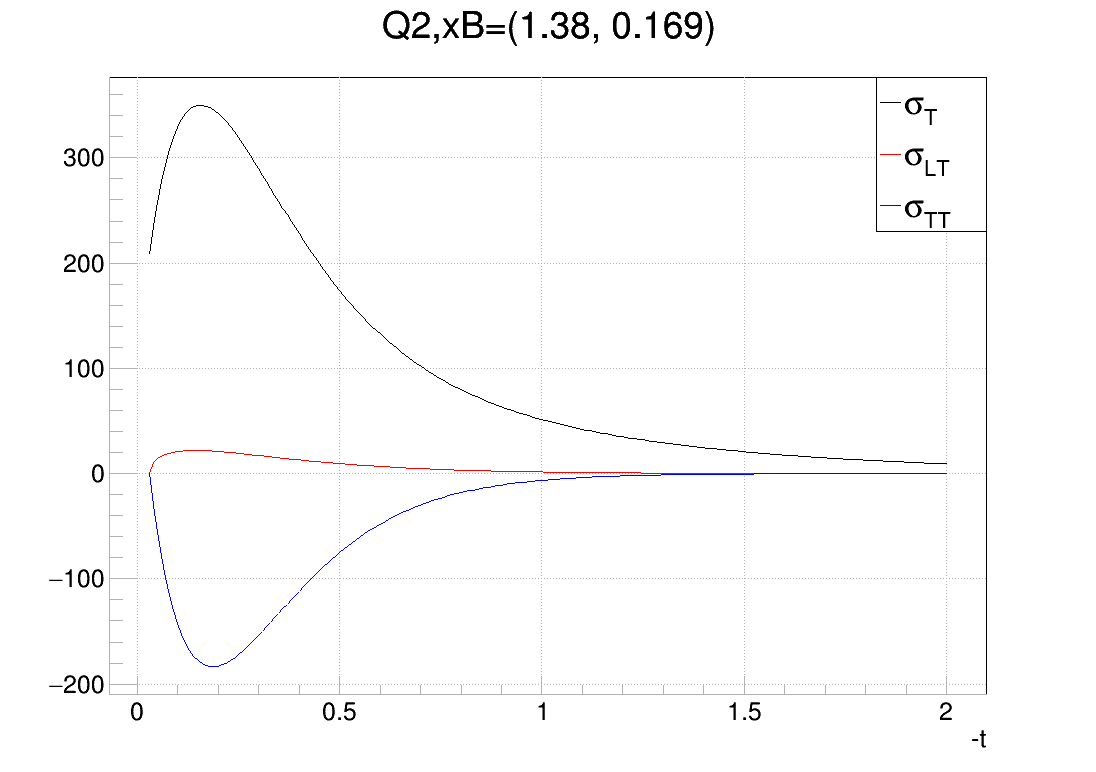

In [5]:
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.SetGrid()
c1.Draw()

mgrs[0].Draw("AL")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


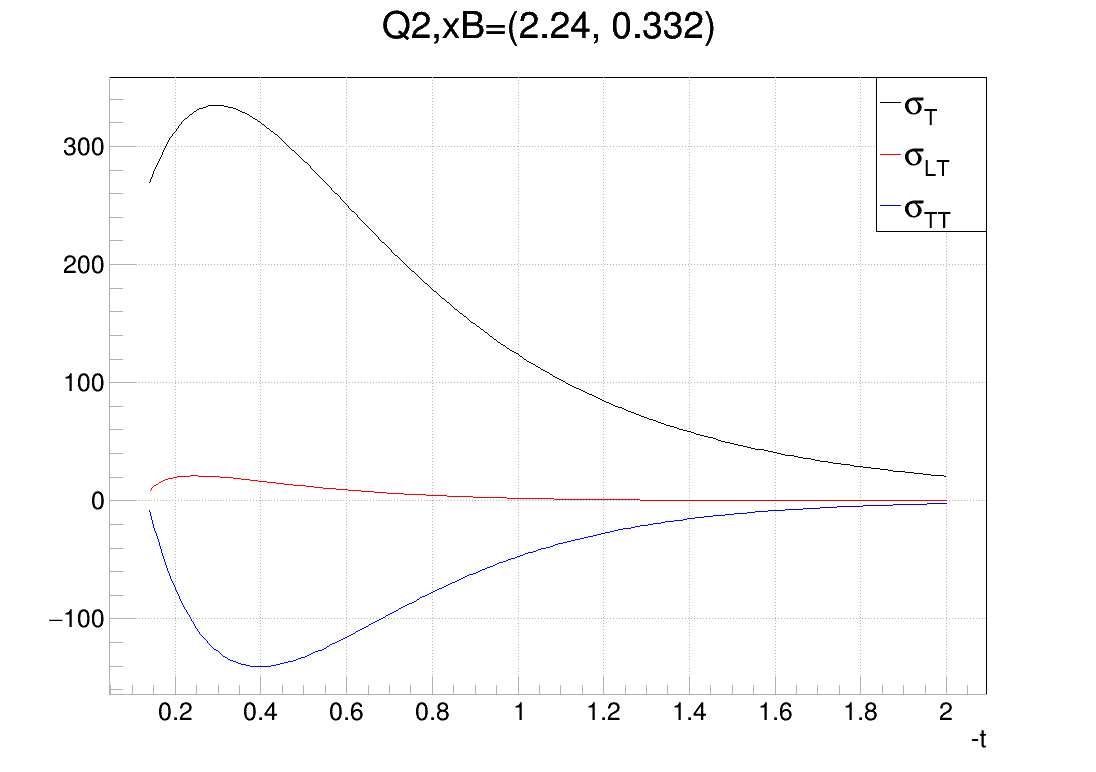

In [6]:
c1 = ROOT.TCanvas("c1","c1",1100,800)
c1.SetGrid()
c1.Draw()

mgrs[1].Draw("AL")

118.3760871 -7.0635139 111.3125732
155.879 -11.7635 144.1155
2.6 0.29 -0.12 1.2946920177746821
--------------------
131.240295 -27.3293393 103.9109557
169.365 -44.759 124.60600000000001
2.6 0.29 -0.22 1.199161331551491
--------------------
121.9362743 -32.6047114 89.3315629
161.012 -53.2736 107.7384
2.6 0.29 -0.32 1.2060507675277672
--------------------
104.2853914 -31.1150858 73.17030559999999
143.537 -50.3822 93.15480000000001
2.6 0.29 -0.42 1.2731230139894347
--------------------
85.5227383 -27.0054595 58.5172788
123.557 -43.0129 80.5441
2.6 0.29 -0.52 1.3764156784406045
--------------------
68.2180669 -22.2698894 45.9481775
104.287 -34.6461 69.64090000000002
2.6 0.29 -0.62 1.5156400925803861
--------------------
53.55401 -17.8169971 35.737012899999996
87.0912 -26.8772 60.214
2.6 0.29 -0.72 1.6849197824253521
--------------------
41.5488085 -13.9410096 27.6077989
72.3721 -20.309 52.063100000000006
2.6 0.29 -0.82 1.8858113313770917
--------------------
32.0161945 -10.7723985 21.24379

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


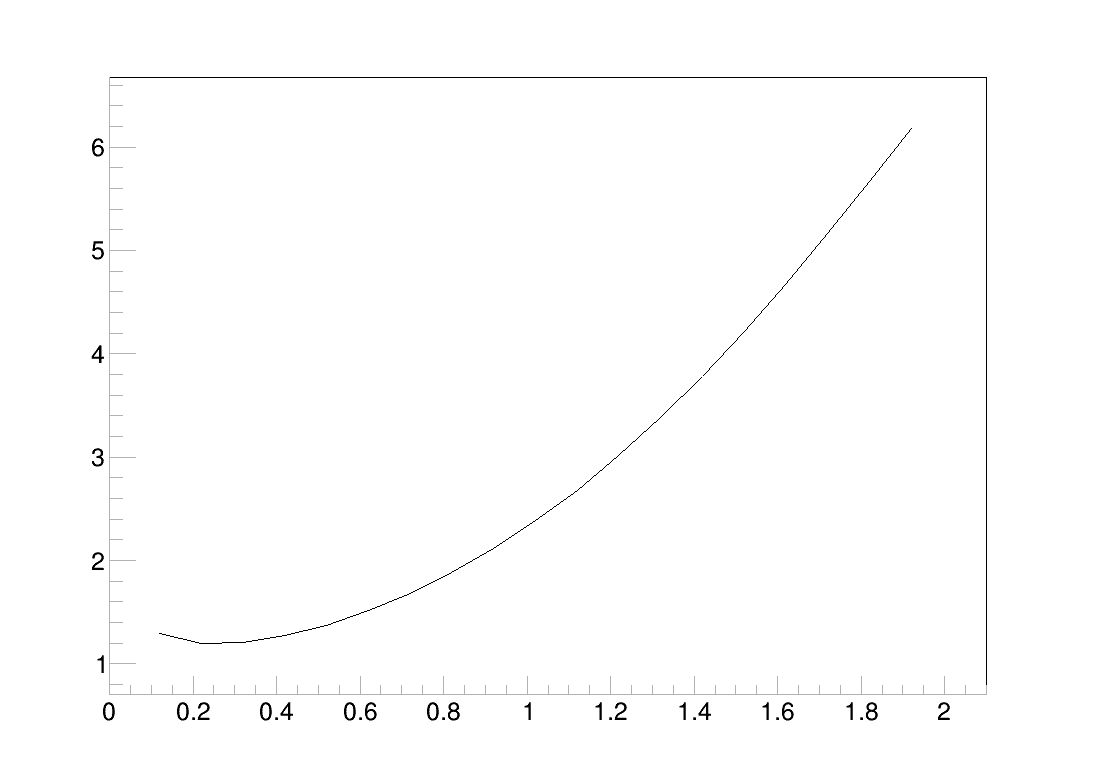

In [25]:
grs = []
for fn in ['2.60_0.29.dat', '3.03_0.39.dat', '4.68_0.37.dat', '4.15_0.51.dat', '6.70_0.57.dat']:
    grs.append(ROOT.TGraph())
    gr = grs[-1]
    with open(fn) as ff:
        for line in ff:
            q2,xb,mt,eps,sl,st,stt,alua,alu = [float(vv) for vv in line.split()]
            tt = -mt
            #print(q2,xb,mt,st+stt)
            htterm = st+stt
            print(st,stt,htterm)
            vpk = !./vpk_dvmpx $mt $xb $q2 0 10.6041
            if vpk:
                eps,st,sl,stt,slt = [float(vv) for vv in vpk[0].split()]
                print(st,stt,st+stt)
                rHT = (st+stt)/htterm
                print(q2,xb,mt,rHT)
                print("--------------------")
                gr.SetPoint(gr.GetN(), tt, rHT)
c1= ROOT.TCanvas("c1","c1",1100,800)
c1.Draw()
grs[0].Draw("AL")